In [58]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
from matplotlib import pyplot as plt

In [36]:
water_eng_file = open('Runs/Water/water_aimd_1ns_every0.5fs-1.ener', 'r')
proton_eng_file = open('Runs/Proton/proton_aimd_1ns_every0.5fs-1.ener', 'r')

times = []
water_KE, water_PE = [], []
proton_KE, proton_PE = [], []


for line in water_eng_file.readlines():
    #print(line)
    if line[0] == '#':
        continue
    data = line.strip().split()
    step = int(data[0])
    time = float(data[1])       #fs
    KE = float(data[2])         
    temp = float(data[3])
    U = float(data[4])
    used_time = float(data[5])  #s
    
    times.append(time)
    water_KE.append(KE)
    water_PE.append(U)
#print(water_PE)
    
for line in proton_eng_file.readlines():
    if line[0] == '#':
        continue
    data = line.strip().split()
    step = int(data[0])
    time = float(data[1])       #fs
    KE = float(data[2])         
    temp = float(data[3])
    U = float(data[4])
    used_time = float(data[5])  #s
    
    proton_KE.append(KE)
    proton_PE.append(U)


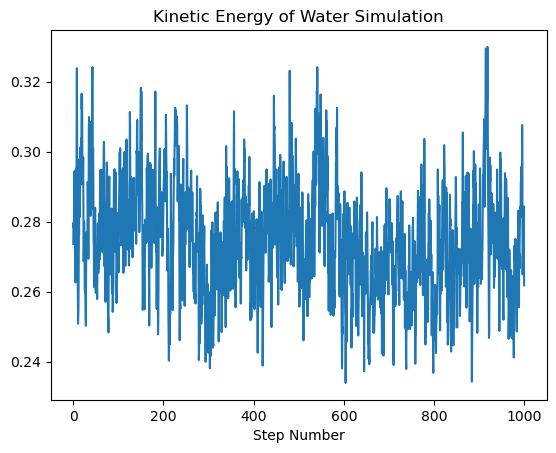

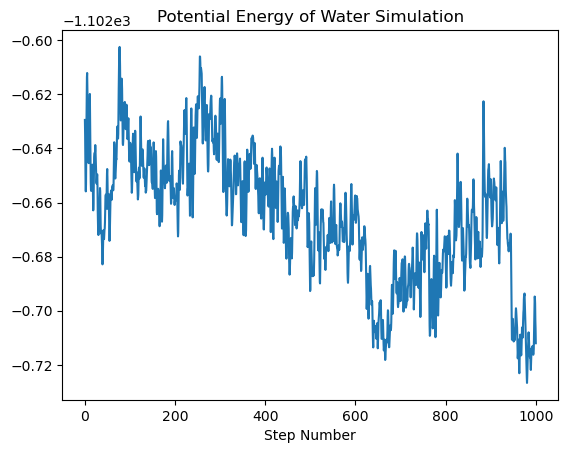

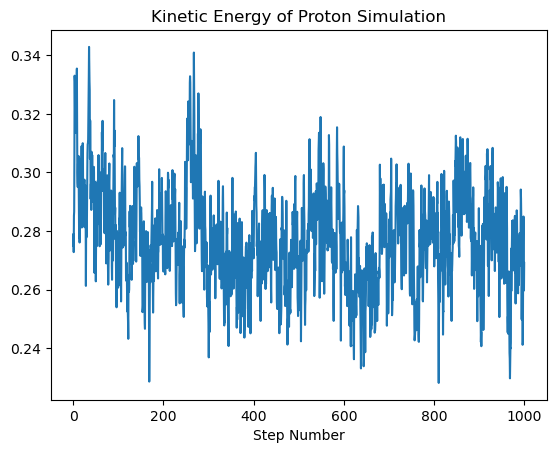

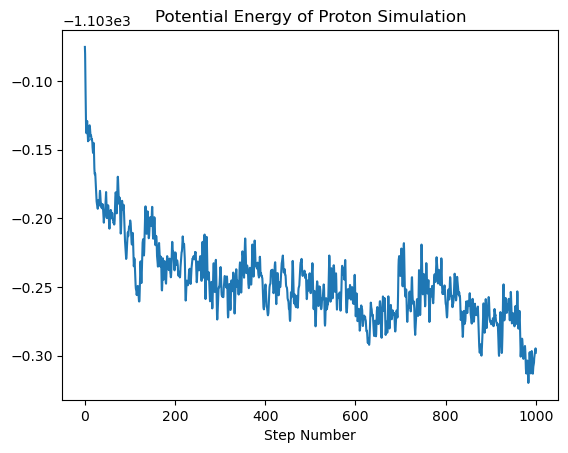

In [45]:
plt.plot(times, water_KE)
plt.title('Kinetic Energy of Water Simulation')
plt.xlabel('Step Number')
plt.savefig('Figures/water_KE.png')
plt.show()

plt.plot(times, water_PE)
plt.title('Potential Energy of Water Simulation')
plt.xlabel('Step Number')
plt.savefig('Figures/water_PE.png')
plt.show()

plt.plot(times, proton_KE)
plt.title('Kinetic Energy of Proton Simulation')
plt.xlabel('Step Number')
plt.savefig('Figures/proton_KE.png')
plt.show()

plt.plot(times, proton_PE)
plt.title('Potential Energy of Proton Simulation')
plt.xlabel('Step Number')
plt.savefig('Figures/proton_PE.png')
plt.show()

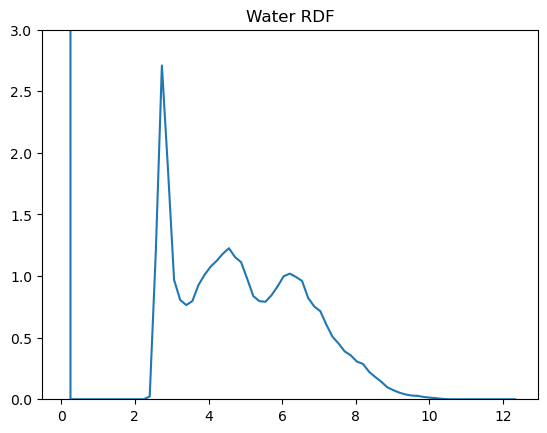

In [66]:
water = mda.Universe('Runs/Water/water.pdb', 'Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz')
box_vectors = [12.42, 12.42, 12.42, 90, 90, 90]
water.dimensions = box_vectors
O_water = water.select_atoms('name O')

rdf_water = rdf.InterRDF(O_water, O_water, range=(0, 12.42))
rdf_water.run()
plt.plot(rdf_water.bins, rdf_water.rdf)
plt.title('Water RDF')
plt.ylim(0, 3)
plt.savefig('Figures/water_rdf.png')
plt.show()

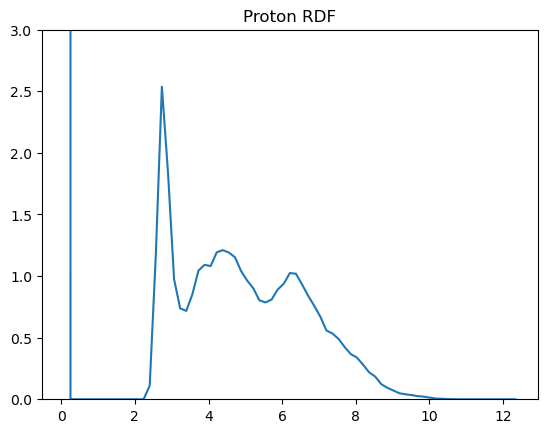

In [67]:
proton = mda.Universe('Runs/Proton/proton.pdb', 'Runs/Proton/proton_aimd_1ns_every0.5fs-pos-1.xyz')
box_vectors = [12.42, 12.42, 12.42, 90, 90, 90]
proton.dimensions = box_vectors
O_proton = proton.select_atoms('name O')

rdf_proton = rdf.InterRDF(O_proton, O_proton, range=(0, 12.42))
rdf_proton.run()
plt.plot(rdf_proton.bins, rdf_proton.rdf)
plt.title('Proton RDF')
plt.ylim(0, 3)
plt.savefig('Figures/proton_rdf.png')
plt.show()